3
Statevector: Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


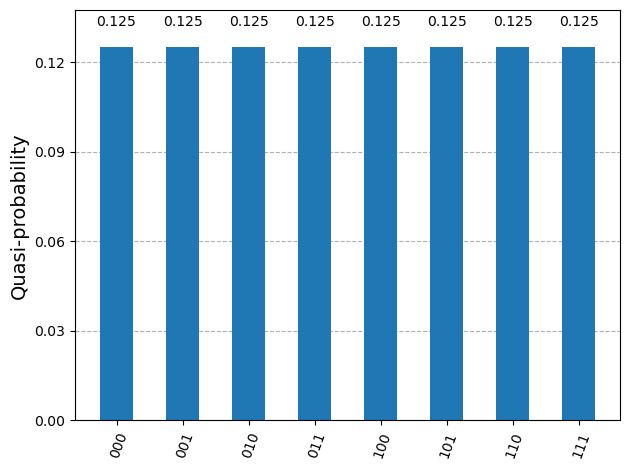

        ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤M├──────
        ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░──╫─┤M├───
        ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2 
global phase: 3π/4
          ┌─────────┐┌────┐┌─────────┐ ░ ┌─┐      
 q_0 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░─┤M├──────
          ├─────────┤├────┤├─────────┤ ░ └╥┘┌─┐   
q_1 -> 23 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫─┤M├───
          ├─────────┤├────┤├─────────┤ ░  ║ └╥┘┌─┐
q_2 -> 96 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─░──╫──╫─┤M├
          └─────────┘└────┘└─────────┘ ░  ║  ║ └╥┘
  meas: 3/════════════════════════════════╩══╩══╩═
                                          0  1  2 


In [1]:
# genera un numero intero in un intervallo tra due numeri interi con un simulatore reale
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeFez
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector

# input
a = int(input('inserisci l\'estremo sx dell\'intervallo\' (intero) : \n'))
b = int(input('inserisci l\'estremo sx dell\'intervallo\'(intero) : \n'))
# lavoriamo prima su [0,b-a] e poi [a,b]
num_bit = (b-a).bit_length()
print(num_bit)

# Creazione circuito.
qc = QuantumCircuit(num_bit)
for i in range(num_bit) : # i = riga del circuito
    qc.h(i)

# statevector
state = Statevector.from_instruction(qc) 
print("Statevector:", state) # Print the statevector
probs = state.probabilities_dict() # Get the probabilities of each state
plot_histogram(probs)
plt.show()

qc.measure_all()
print(qc)

simulator = FakeFez()
qc_transpiled = transpile(qc,simulator)
print(qc_transpiled)

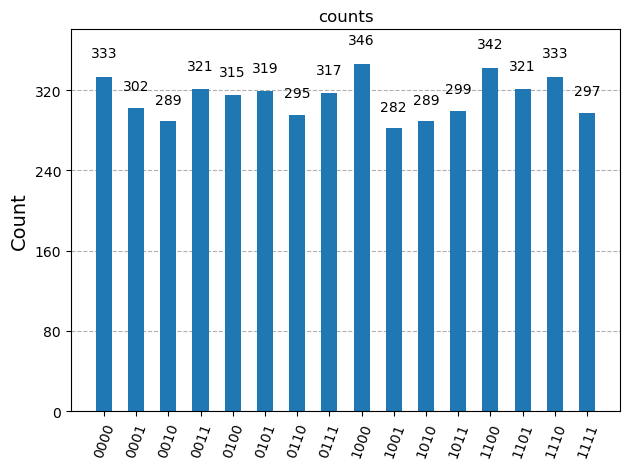

DescribeResult(nobs=np.int64(16), minmax=(np.int64(282), np.int64(346)), mean=np.float64(312.5), variance=np.float64(394.6666666666667), skewness=np.float64(0.13241011727624202), kurtosis=np.float64(-1.1487951972242514))
numero casuale intero tra 0 e 10: 1


In [4]:
%matplotlib inline

# verifichiamo probabilità
shots = 1024
result = simulator.run(qc_transpiled, shots=shots).result()
# istogramma dei counts
counts = result.get_counts()
plot_histogram(counts, title='counts')
mpl.pyplot.show()
# analsi statistica
valori_int = [int(v) for v in counts.values()]
print(scipy.stats.describe(valori_int))

# risultato della misurazione
prop = 1
while( prop == 1 ) :
    result = simulator.run(qc_transpiled, shots=1).result()
    numero_b2 = list(result.get_counts().keys())[0]
    # conversione da base_2 in base_10
    numero_b10 = 0
    k = num_bit - 1
    for cifra in numero_b2:
        numero_b10 = numero_b10 + (int(cifra)) * 2 ** (k)
        k = k - 1
    prop = numero_b10 > (b - a)
    if prop == 0 :
        numero_b10 = a + numero_b10

print(f'numero casuale intero tra {a} e {b}: {numero_b10}')